<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 0px;
    }
</style>

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h1>Predictive Modeling - Logistic Regression</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Analysis</h3>
<h4>1. Research Question</h4>
<p>&nbsp; &nbsp; This analysis will be addressing the question “Which factors push a customer towards
using the tech support services?”</p>
<h4>2. Goals</h4>
<p>&nbsp; &nbsp; The purpose of the analysis is to discover the attributes that determine likeliness of
a customer selecting technical support from the company. All attributes in question will
come from the customer’s account information, demographics, and business services. The
point of selecting tech support as the main feature of this research is to assist the business
in how they market this feature to customers. Adding discounts or other benefits that aligns
with the demographic likely to use this feature will result in more customers with this
service. Aside from the goal of discovering information related to the dependent variable,
the secondary goal of this analysis is to provide marketable insight for the company.</p>

<h2>Part II: Method Justification</h2>
<h3>B. Logistic Regression Methods</h3>
<h4>1. Summary of Assumptions</h4>
<p>&nbsp; &nbsp; Much like a linear regression model, there are assumptions that are necessary for a
logistic regression model to be considered valid. A very important assumption to make is
that the dependent variable is binary and has only two possible values. The variable in
question, ‘TechSupport’ only allows ‘Yes’ or ‘No’ as a value so this variable can be used for
analysis. Another stipulation is the sample size of the data set. The size must be large
enough to draw a conclusion that can be applicable to other samples otherwise the test’s
results might be too biased and volatile. This model also assumes that there are no
extreme outliers present within the dependent and independent variables. In any test,
outliers can sway the results in a way that does not reflect an accurate value for most
samples, so eliminating them is important for precision. And as is the same with linear
regression, there can be no multicollinearity in the independent variables. Multicollinearity
occurs when two variables are highly correlated and “do not provide unique or independent
information in the regression model” (Bobbitt, 2020). Using variables that are highly related
will reveal no new insights and could lead to the model overfitting.</p>
<h4>2. Tool Benefits</h4>
<p>&nbsp; &nbsp; When it comes to data analytics, Python is a great tool in performing various
calculations and operations. Overall, the language’s “philosophy puts a high focus on code
readability” which makes it more accessible to a wider audience (Let’s Decode, 2023).
Furthermore, having such a large audience increases the flexibility of the language, and
keep creators invested in maintaining the language and libraries. Python has several
libraries that support analyzing large swathes of data; I will be using the following libraries
for this project:</p>
<ul>
<li>Pandas - Enables users to manipulate large series and data frames. It is flexible in
operations and is compatible with the other libraries listed.</li>
<li>Matplotlib.pyplot - Visualizes graph plots generated from this library, or other
libraries such as Pandas or Seaborn.</li>
<li>Numpy - Handles mathematical operations that can be used for statistics.</li>
<li>Seaborn - A library that generates a variety of graphs from lists, series or data frames.</li>
<li>Statsmodels.api - Used for its ability to create statistic models and detailed
summaries.</li>
<li>Sklearn.metrics - In the context of this project, this library is used to find the
accuracy score of the confusion matrix.</li>
</ul>
<h4>3. Appropriate Technique</h4>
<p>&nbsp; &nbsp; Logistic regression is an acceptable method to discover the variables that make a
customer more likely to use technical support. The technique itself “is used to describe
data and explain the relationship between one dependent binary variable and
…independent variables” (Statistics Solutions, n.d.). The results obtained from this model
can allow the analyst not only to discover influential factors, but also to make calculations
about a future customer’s behavior based on their other variables. Using ‘TechSupport’ as
the dependent variable in conjunction with other independent variables, a customer’s
predictability will be determined through logistic regression.</p>

<h2>Part III: Data Preparation</h2>
<h3>C. A Summary of the Data Preparation Process</h3>
<h4>1. Data Cleaning</h4>
<p>&nbsp; &nbsp; The purpose of data cleaning is to remove potential errors that might interfere with
the results from the logistic regression. The goal of this process involves discovering and
treating duplicates, missing values, and outliers. See the ‘NBM3 Task 2.py’ file for the entire
process.
&nbsp; &nbsp; Detecting and eliminating existing duplicates is the first step in the cleaning
process. I began finding complete row duplicates by subtracting the length of the raw
database from the length of the database with the ‘drop_duplicates()’ method applied to it.
The results indicated there were no exact row duplicates. Another area of potential
duplicates comes from variables where only unique values are allowed such as
‘CaseOrder’, ‘Customer_id’ and ‘Interaction.’ Detecting this with the ‘duplicated()’ function
too resulted in no duplicates existing within these columns.
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (accuracy_score) 

class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


df = pd.read_csv('churn_clean.csv', keep_default_na = False, 
                 na_values = [' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN',
                             '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'])
# Index values are the same as CaseOrder
df.index = df.index + 1
print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)

# region Clean Data
# Duplicates
def detect_duplicates(col_name):
   """Detect Duplicates: 
      Detects duplicate values in a single column.
   """
   print(f"{col_name}: ",  df.duplicated(subset = col_name).sum())

print(text.UNDERLINE + "Detecting Duplicates" + text.END)
print("Exact row: ", len(df)-len(df.drop_duplicates()))
detect_duplicates('CaseOrder');
detect_duplicates('Customer_id');
detect_duplicates('Interaction');
df.drop_duplicates()


-- Begin Data Analytics --

Detecting Duplicates
Exact row:  0
CaseOrder:  0
Customer_id:  0
Interaction:  0


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; For addressing missing values, combining the ‘isna()’ function with ‘sum()’ displays
the number of null values within the database. This test demonstrates no null values
present and so no treatment is necessary.</p>

In [2]:
# Missing Values
print(text.UNDERLINE + "\nDetecting Missing Values" + text.END)
print(df.isna().sum())


Detecting Missing Values
CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; To detect outliers, numeric values are first sorted by where the information was
obtained, namely from a census, sign-up, or from the business itself. This will help me take
into consideration the credibility of the values that might be marked as a potential outlier.
With the ‘describe()’ method, the standard deviation and quintile of every numeric variable
is displayed. The census (‘Population’), business values (‘Outage_sec_perweek’, ‘Email’,
‘Contacts’, ‘Yearly_equip_failure’, ‘Tenure’, ‘MonthlyCharge’, and ‘Bandwidth_GB_Year’) and
some sign-up values (‘Age’, and ‘Children’) were within reason and showed believable data
ranges. The range of ‘Income’ was suspiciously wide with a minimum value of 348.67 and a
maximum value of 258,900.70. Given that this is a sign-up value, the chances of
misinformation being reported is higher than values from the other categories, so ‘Income’
requires treatment of its outliers. Using the interquartile range with a threshold of 1.5
yielded 336 rows outside the acceptable range and as this represents only three percent of
all rows, these outliers will be removed from the data set.</p>

In [3]:
def describe_vars(list_name, list):
   """Describe Vars: 
      Used to describe variables and to visually check for outliers. 


      Compare min and max to each other.
      Compare if 25% is close to min and if 75% is close to max.
      Consider where the information was obtained.
   """
   print(f"{list_name} Values")
   print(str(df[list].describe()) + "\n")
def treat_outliers(col):
   """Treat Outliers: 
      Used to treat outliers using IQR. 
   """
   q1 = df[col].quantile(0.25)
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
   print(f"Outlier Count for {col}: {len(outliers)}")
   df.drop(outliers.index, inplace=True)
   print(f"New dataframe length: {len(df)}\n" )
   print(str(df[col].describe()))
# Outliers
census_list = ['Population']
signup_list = ['Age', 'Children', 'Income']
business_list = ['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 
                'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
print(text.UNDERLINE + "\nDetecting Outliers" + text.END)
describe_vars("Census", census_list);
describe_vars("Sign-up", signup_list);
describe_vars("Business Generated", business_list);
print(text.UNDERLINE + "Treating Outliers" + text.END)
treat_outliers('Income')


Detecting Outliers
Census Values
          Population
count   10000.000000
mean     9756.562400
std     14432.698671
min         0.000000
25%       738.000000
50%      2910.500000
75%     13168.000000
max    111850.000000

Sign-up Values
                Age    Children         Income
count  10000.000000  10000.0000   10000.000000
mean      53.078400      2.0877   39806.926771
std       20.698882      2.1472   28199.916702
min       18.000000      0.0000     348.670000
25%       35.000000      0.0000   19224.717500
50%       53.000000      1.0000   33170.605000
75%       71.000000      3.0000   53246.170000
max       89.000000     10.0000  258900.700000

Business Generated Values
       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.63595

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h4>2. Summary Statistics</h4>
<p>&nbsp; &nbsp; ‘TechSupport’ is the dependent variable for this project followed by twelve
independent variables. These twelve include ‘Children’, ‘Age’, ‘Income’,
‘Outage_sec_perweek’, ‘Yearly_equip_failure’, ‘Tenure’, and ‘MonthlyCharge’ for numeric
values and ‘Gender’, ‘Techie’, ‘InternetService’, ‘Tablet’, and ‘Phone’ for categorical values.</p>
<ul>
<li>Children - About half of customers have one or no children. Filtering the csv file reveals 985
customers have five or more children.</li>
<li>Age - The minimum age of a customer is 18 years with every quintile of data almost
aligning with the standard deviation. </li>
<li>Income - With the outliers removed, the new maximum value is 104,166.70 which is closer to
the minimum (348.67) than the previous maximum (258,900.70).</li>
<li>Outage_sec_perweek - Only half of customers experience ten or more seconds of system outages per
week.</li>
<li>Yearly_equip_failure - Most customers do not experience an annual failure in their equipment. Only 3273
customers have one or more according to a filter on the csv file.</li>
<li>Tenure - The average customer has stayed 2 years and 10 months (34 months) with the
provider.</li>
<li>MonthlyCharge - The smallest monthly charge a customer has with the business is $79.98 with the
most being $290.16 a month.</li>
<li>Gender - Male and female is close to a fifty-fifty split with nonbinary people as a minority of
customers.
<ul>
<li>Female: 50.2%</li>
<li>Male: 47.5%</li>
<li>Nonbinary: 2.3%</li></ul></li>
<li>Techie - Most customers do not consider themselves technically inclined.
<ul>
<li>No: 83.2%</li>
<li>Yes: 16.8%</li>
</ul></li>
<li>InternetService - Those that use fiber optic account for the majority customers with fiber optic having
more than double the amount that have no internet service.
<ul>
<li>Fiber Optic: 44.1%</li>
<li>DSL: 34.6%</li>
<li>None: 21.4%</li>
</ul></li>
<li>Tablet - Most clients do not have a tablet
<ul>
<li>No: 70.1%</li>
<li>Yes: 29.9%</li>
</ul></li>
<li>Phone - There is a significant majority of customers who own a phone.
<ul>
<li>No: 9.3%</li>
<li>Yes: 90.7%</li>
</ul></li>
<li>TechSupport - This is the dependent variable and the entire point of this analysis. Most customers
do not use the tech support services by almost two-thirds.
<ul>
<li>No: 62.6%</li>
<li>Yes: 37.4%</li>
</ul></li>
</ul>

In [4]:
def view_categorical_values(cols):
    """View Categorical Values: 
        Used to visually check unique values for categorical columns. 
    """
    for col in cols:  
      print(str(df[col].value_counts())+ "\n")
# region Describing Regression Variables
print(text.UNDERLINE + "\nDescribing Variables for Analysis" + text.END)
independent_numeric =['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']
independent_categorical = ['Gender', 'Techie', 'InternetService', 'Tablet', 'Phone']
dependent_var = 'TechSupport'

describe_vars("Numeric Variables", independent_numeric);
print("Categorical Variables")
view_categorical_values(independent_categorical);
print("Dependent Variable")
view_categorical_values([dependent_var]);


Describing Variables for Analysis
Numeric Variables Values
          Children          Age         Income  Outage_sec_perweek  \
count  9664.000000  9664.000000    9664.000000         9664.000000   
mean      2.086403    53.106374   36735.908054           10.005020   
std       2.147776    20.700889   22884.354650            2.972161   
min       0.000000    18.000000     348.670000            0.099747   
25%       0.000000    35.000000   18759.700000            8.029264   
50%       1.000000    53.000000   32086.370000           10.018560   
75%       3.000000    71.000000   50636.515000           11.971299   
max      10.000000    89.000000  104166.700000           21.207230   

       Yearly_equip_failure       Tenure  MonthlyCharge  
count           9664.000000  9664.000000    9664.000000  
mean               0.397144    34.506516     172.594371  
std                0.634788    26.456348      42.906255  
min                0.000000     1.000259      79.978860  
25%                

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h4>3. Visualizations</h4>

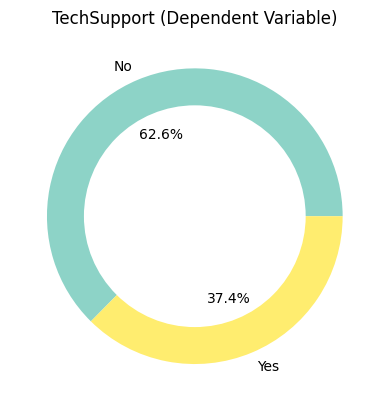

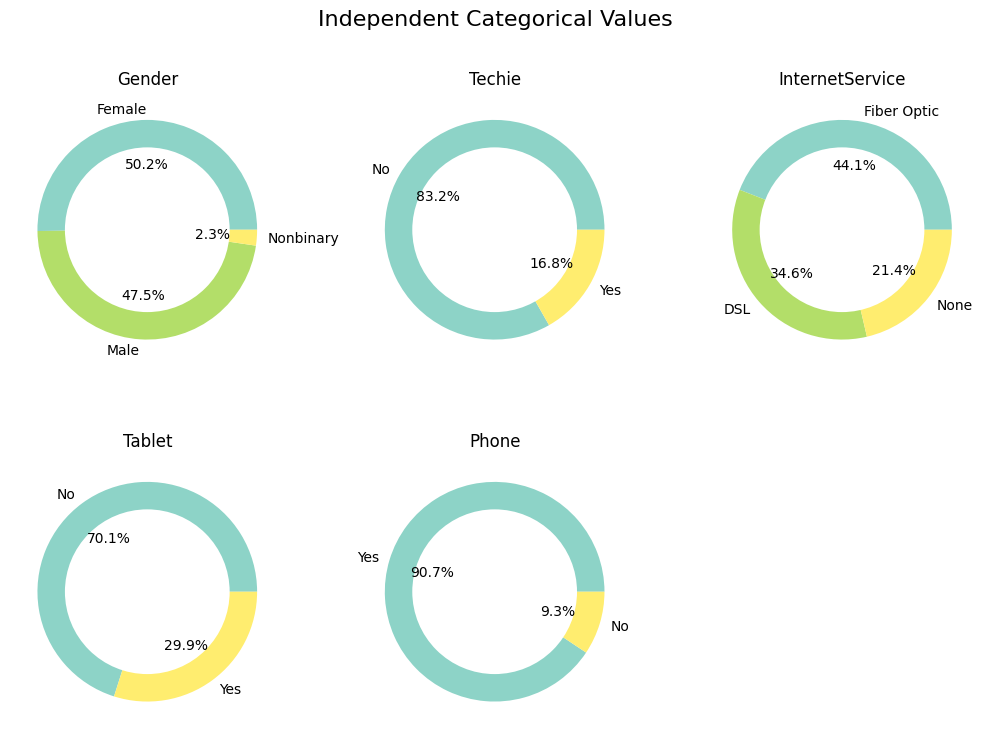

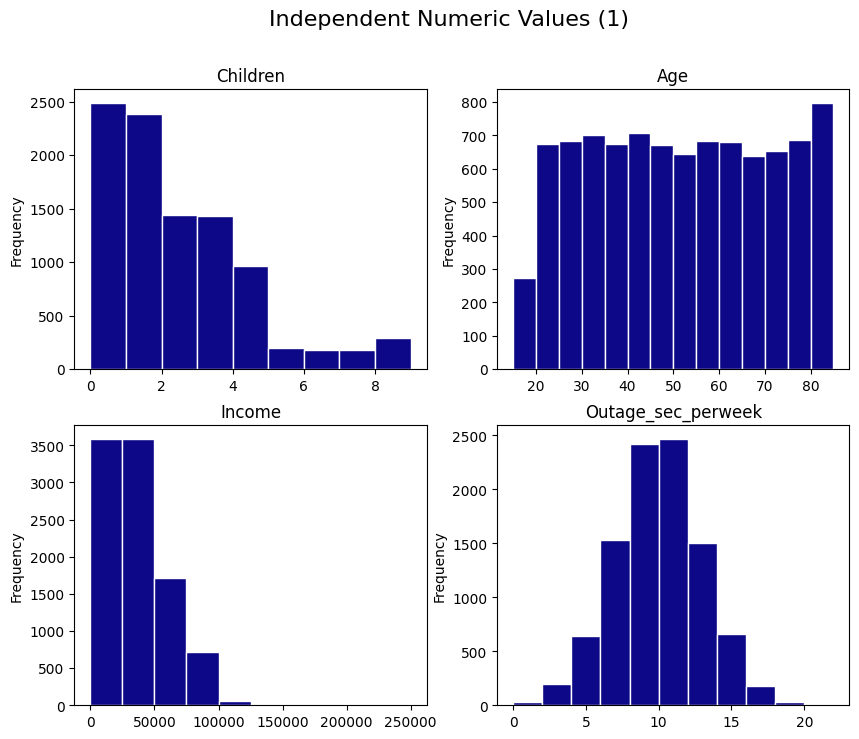

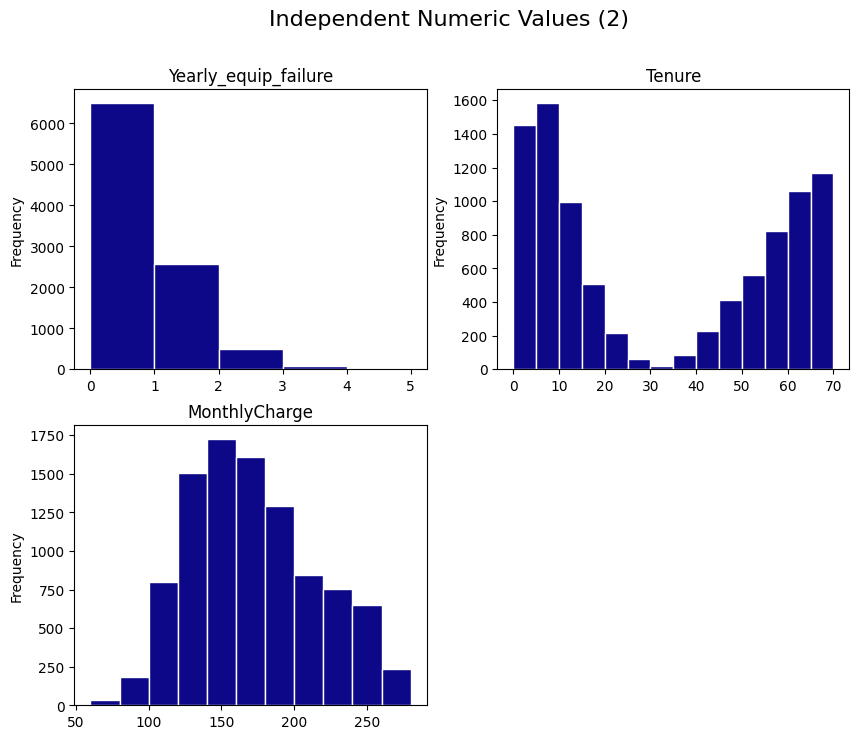

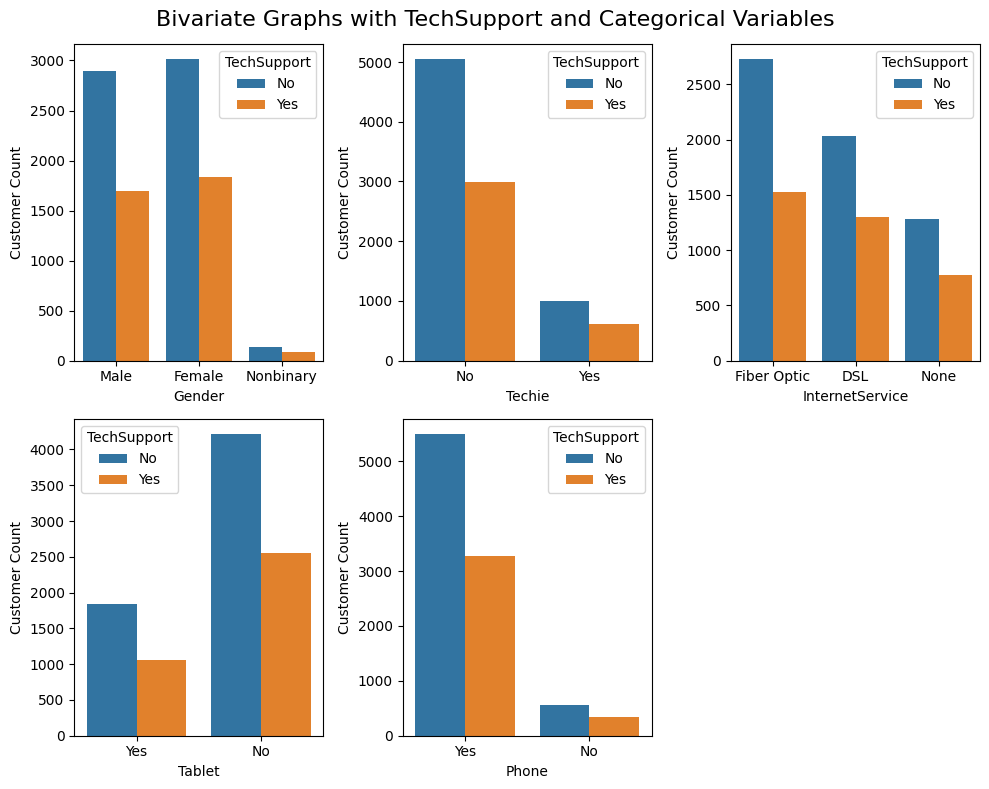

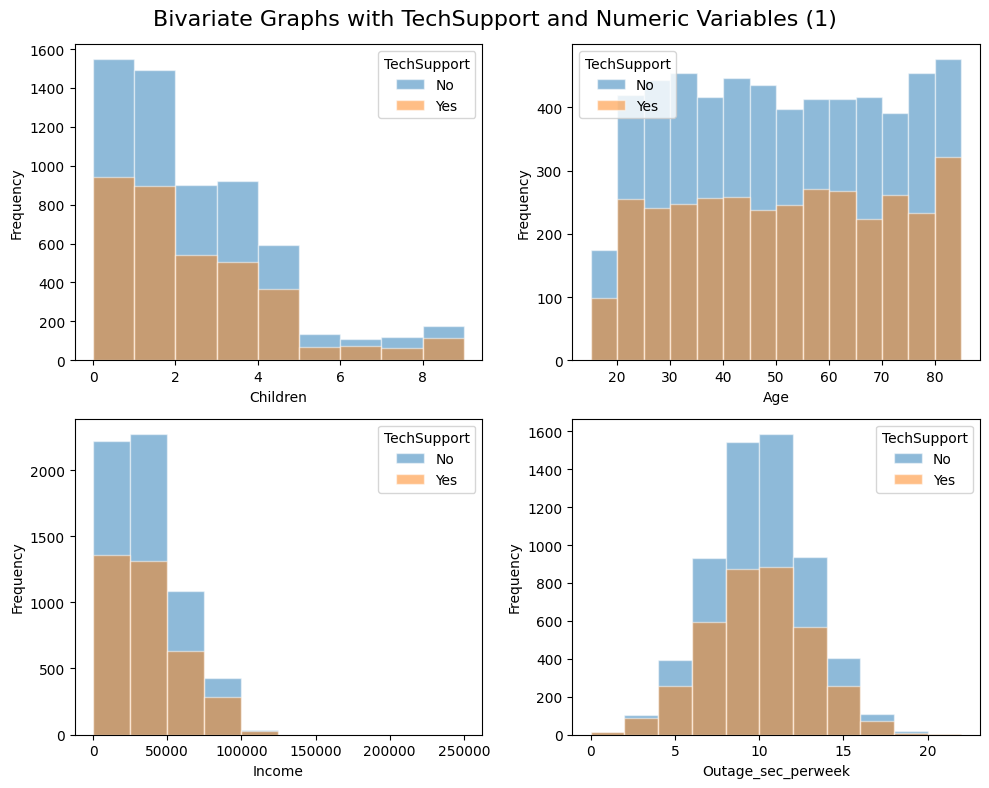

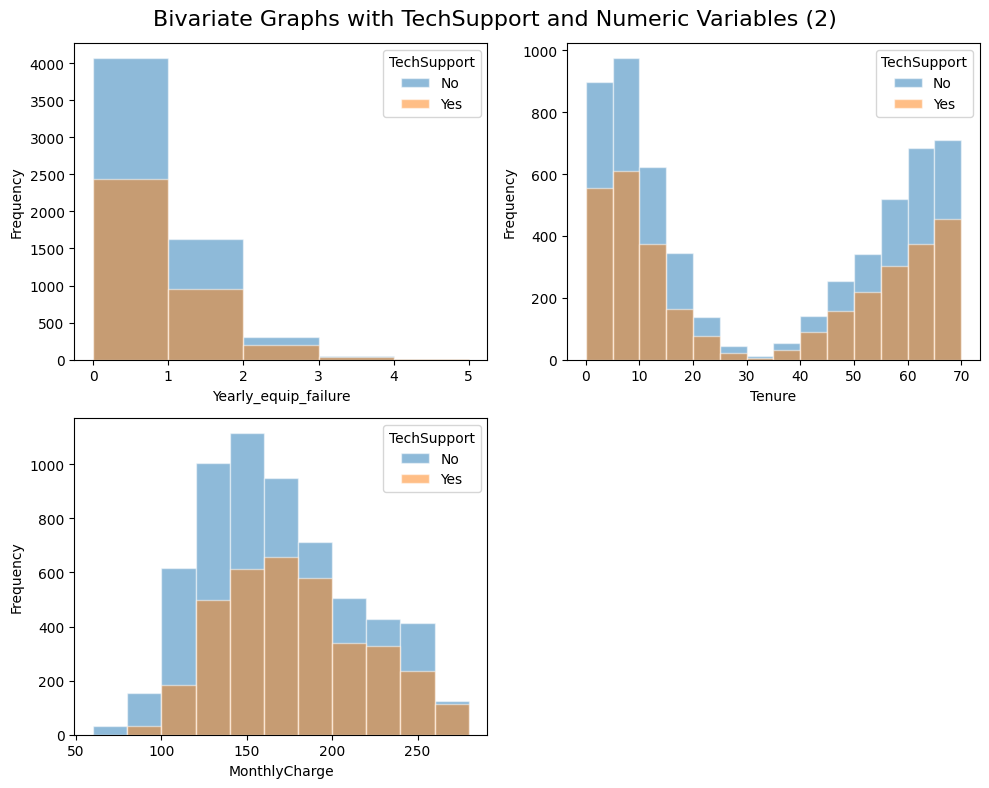

In [5]:
def plot_categorical_values(cols):
   """Plot Categorical Values:
      Univariate plots for a list of categorical values
   """
   # calculate columns for the plot window
   fig = plt.figure(figsize = (10,8))
   fig.suptitle('Independent Categorical Values', fontsize= 16)
   index = 1
   for col in cols:
      plt.subplot(2,3, index)
      # makes a donut graph for categorical values
      df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Set3', title=col)
      circle = plt.Circle((0, 0), 0.75, fc='white')
      plt.gcf().gca().add_artist(circle)
      plt.ylabel(None)
      index += 1
   plt.tight_layout()
   plt.show()
def plot_numeric_values(cols, part):
   """Plot Numeric Values:
      Univariate plots for a list of numeric values.
      Runs twice because of the number of numeric values
   """
   # These are the bin ranges for each bar graph
   ranges = []
   if part == 1:
      ranges = [range(0,10), range(15, 90, 5), range(0,260000,25000), range(0, 24, 2)]
   else: 
      ranges = [range(0,6), range(0, 75, 5), range(60, 300, 20)]
   # calculate columns for the plot window
   total_cols = round(len(cols)/2)
   fig = plt.figure(figsize = (10,8))
   fig.suptitle(f'Independent Numeric Values ({part})', fontsize= 16)
   index = 1
   for col in cols:
      plt.subplot(2,total_cols, index)
      df[col].plot(
      kind='hist', bins=ranges[index-1], colormap='plasma', edgecolor='white', linewidth=1, title=col)
      index += 1
   plt.show()
def bivariate_categorical(cols, dependent):
   """Bivariate categorical:
      Bivariate plots with independent categorical variables and the dependent variable
      They are plotted as count plots.
   """
   current_col = 0
   current_row = 0
   fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
   fig.suptitle(f"Bivariate Graphs with {dependent} and Categorical Variables", fontsize= 16)
   for col in cols:
      # Creates count subplots [In-Text Citation: (GeeksforGeeks, 2021)]
      sns.countplot(x=col, hue=dependent_var, data=df, ax=axes[current_row,current_col])
      axes[current_row,current_col].set_ylabel("Customer Count")
      if(current_col < 2):
         current_col += 1
      else:
         current_col = 0
         current_row += 1
   # Deletes extra graph space [In-Text Citation: (LeoC & DannyMoshe, 2015)]
   fig.delaxes(axes[1,2])
   plt.tight_layout()
   plt.show()
def bivariate_numeric(cols, dependent, part):
   """Bivariate numeric:
      Bivariate plots with independent numeric variables and the dependent variable.
   """
   current_col = 0
   current_row = 0
   ranges = []
   if part == 1:
      ranges = [range(0,10), range(15, 90, 5), range(0,260000,25000), range(0, 24, 2)]
   else: 
      ranges = [range(0,6), range(0, 75, 5), range(60, 300, 20)]
   fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
   fig.suptitle(f"Bivariate Graphs with {dependent} and Numeric Variables ({part})", fontsize= 16)
   for i in range(len(cols)):
      df.groupby(dependent)[cols[i]].plot.hist(alpha=0.5, bins=ranges[i], ax=axes[current_row,current_col], edgecolor='white', linewidth=1)
      axes[current_row,current_col].legend(labels=sorted(df[dependent].unique()), title=dependent)
      axes[current_row,current_col].set_xlabel(cols[i])
       # The row index value is updated before the column
      if(current_col < 1):
         current_col += 1
      else:
         current_col = 0
         current_row += 1
   if part == 2:
      fig.delaxes(axes[1,1])
   plt.tight_layout()
   plt.show()
# graphs
df[dependent_var].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Set3', title=f"{dependent_var} (Dependent Variable)")
circle = plt.Circle((0, 0), 0.75, fc='white')
plt.gcf().gca().add_artist(circle)
plt.ylabel(None)
plt.show()
plot_categorical_values(independent_categorical);
# Since there are so many numeric variables, they are split into two subplots
plot_numeric_values(independent_numeric[0:4], 1);
plot_numeric_values(independent_numeric[4:7], 2);
bivariate_categorical(independent_categorical, dependent_var)
bivariate_numeric(independent_numeric[0:4], dependent_var, 1)
bivariate_numeric(independent_numeric[4:7], dependent_var, 2)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h4>4. Data Transformation</h4>
<p>&nbsp; &nbsp; There are two goals for data transformation. The first is to eliminate all columns that
are irrelevant to the analysis. The second goal is to transform all remaining categorical
variables into dummy variables.

&nbsp; &nbsp; For the first goal, a filter is applied over the entire data frame (with the ‘.filter()’
method) retaining only independent and dependent variables. This operation replaces the
original data frame and is confirmed as successful by printing all the column names.</p>

In [6]:
# region Data Transformation
print(text.UNDERLINE + "\n\nData Transformations" + text.END)
# remove excess columns
relevant_columns = independent_categorical + independent_numeric
relevant_columns.append(dependent_var)
df = df.filter(relevant_columns)
print("Excess Columns Removed. Remaining Columns:")
print(df.columns.values)



Data Transformations
Excess Columns Removed. Remaining Columns:
['Gender' 'Techie' 'InternetService' 'Tablet' 'Phone' 'Children' 'Age'
 'Income' 'Outage_sec_perweek' 'Yearly_equip_failure' 'Tenure'
 'MonthlyCharge' 'TechSupport']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; To change all categorical variables into dummy values the Pandas library’s
‘.get_dummies()’ function is used. This converts ‘Gender’, ‘Techie’, ‘InternetService’, ‘Tablet’,
and ‘Phone’ into binary numeric values. To prevent multicollinearity, the ‘drop_first’
attribute is applied to the dummies function so just k-1 variables are generated (k being the
number of options of a categorical variable). This transformation is also verified by printing
the column names again.</p>

In [9]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
print("With Dummy Columns:")
print(df.columns.values)

With Dummy Columns:
['Children' 'Age' 'Income' 'Outage_sec_perweek' 'Yearly_equip_failure'
 'Tenure' 'MonthlyCharge' 'Gender_Male' 'Gender_Nonbinary' 'Techie_Yes'
 'InternetService_Fiber Optic' 'InternetService_None' 'Tablet_Yes'
 'Phone_Yes' 'TechSupport_Yes']


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h4>5. Prepared Data Set</h4>
<p> &nbsp; &nbsp; The results of the data cleaning and transformation are in a file named
‘churn_regression.csv’.</p>

<h2>Part IV: Model Comparison and Analysis</h2>
<h3>D. Initial and Reduced Logistic Regressions</h3>
<h4>1. Initial Model</h4>

In [10]:
def regression_summary(cols, y, dropped):
   """Regression Summary:
      Generatees the logistic regression summary
   """
   #[In-Text Citation: (GeeksforGeeks, 2023)]
   print(f"\nDropped Columns: {dropped[1:]}")
   x = sm.add_constant(cols, prepend=False)
   log_reg = sm.Logit(y, x).fit()
   print(log_reg.summary())
   return log_reg
# region Logistic Regression
print(text.UNDERLINE + "\nLogistic Regression" + text.END)
dummy_dependent = "TechSupport_Yes"
kept_columns = ['MonthlyCharge', 'InternetService_Fiber Optic']
dropped_columns = [dummy_dependent, 'Income', 'Tenure', 'Children', 'Gender_Nonbinary','Yearly_equip_failure', 
                   'Phone_Yes', 'Techie_Yes', 'InternetService_None', 'Gender_Male', 'Tablet_Yes', 'Outage_sec_perweek', 'Age']
regression_summary(df.drop(columns=dropped_columns[0:1]), df[dummy_dependent], dropped_columns[0:1])


Logistic Regression

Dropped Columns: []
Optimization terminated successfully.
         Current function value: 0.651328
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        TechSupport_Yes   No. Observations:                 9664
Model:                          Logit   Df Residuals:                     9649
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                 0.01476
Time:                        12:21:31   Log-Likelihood:                -6294.4
converged:                       True   LL-Null:                       -6388.7
Covariance Type:            nonrobust   LLR p-value:                 1.158e-32
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<h4>2. Justification of Model Reduction</h4>
<p>&nbsp; &nbsp; Variables will be retained based on the size of their p-values to improve statistical
significance. P-values in a regression represent the significance of the relationships
between dependent and independent variables. The smaller number this is, the greater
chance there is that the relationship between the independent variable and dependent is
unmistakable. Eliminating all variables with p-values greater than 0.05 will leave highly
correlated variables that are a “worthwhile addition” to the model (Frost, n.d.). This
evaluation method will be rerun after each variable elimination because other variable’s p-
values might be affected. Once this process is complete, all variables that influence
‘TechSupport’ with a 95% certainty will remain.</p>
<h4>3. Reduced Logistic Regression Model</h4>
<p>&nbsp; &nbsp; From the model information provided in D1, the first variable to be removed will be
the ‘Income’ variable with a p-value of 0.928. Here is the code used to generate the
summaries as well as the summaries themselves.</p>

In [11]:
# region Logistic Regression
print(text.UNDERLINE + "\nLogistic Regression" + text.END)
dummy_dependent = "TechSupport_Yes"
kept_columns = ['MonthlyCharge', 'InternetService_Fiber Optic']
dropped_columns = [dummy_dependent, 'Income', 'Tenure', 'Children', 'Gender_Nonbinary','Yearly_equip_failure', 
                   'Phone_Yes', 'Techie_Yes', 'InternetService_None', 'Gender_Male', 'Tablet_Yes', 'Outage_sec_perweek', 'Age']
for i in range(1, len(dropped_columns)):
   regression_summary(df.drop(columns=dropped_columns[0:i]), df[dummy_dependent], dropped_columns[0:i])
final_model = regression_summary(df.drop(columns=dropped_columns[0:]), df[dummy_dependent], dropped_columns[0:]);


Logistic Regression

Dropped Columns: []
Optimization terminated successfully.
         Current function value: 0.651328
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        TechSupport_Yes   No. Observations:                 9664
Model:                          Logit   Df Residuals:                     9649
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                 0.01476
Time:                        12:23:20   Log-Likelihood:                -6294.4
converged:                       True   LL-Null:                       -6388.7
Covariance Type:            nonrobust   LLR p-value:                 1.158e-32
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>

<p>&nbsp; &nbsp; ‘MonthlyCharge’, and ‘InternetService_Fiber Optic’ are the remaining variables in the
reduced model.</p>

<h3>E. Analysis of Reduced Logistic Regression Model</h3>
<h4>1. Model Comparison</h4>
<p>&nbsp; &nbsp; Similar to how the variables themselves have their meaningfulness indicated by the
p-value, the logistic regression model can also be evaluated by the size of the LLR p-value.
Using the same metrics, a value below 0.05 indicates the “model fits the data better than
the null model” wherein the null model assumes there is no relationship between the
variables (Adams, 2020). The first model, which contained all variables, had a LLR p-value
of 1.158e-32 which is already statistically significant as it is below 0.05. After every model
reduction occurred, this value decreased to 1.280e-39 signifying even greater significance
than the first model. Retaining only a couple of independent variables improved the model
entirely.</p>
<h4>2. Output and Calculations</h4>


Confusion Matrix


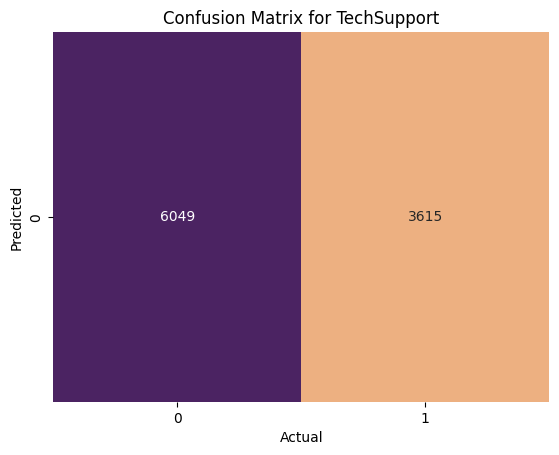


Logistic Test accuracy:  0.6259312913907285

Change in Odds
MonthlyCharge                    0.67 %
InternetService_Fiber Optic    -24.47 %
dtype: object


In [13]:
# confusion matrix
print(text.UNDERLINE + "\nConfusion Matrix" + text.END)
y_predict = final_model.predict(sm.add_constant(df[kept_columns]))
prediction = list(map(round,y_predict))
sns.heatmap(pd.crosstab(columns = df[dummy_dependent], colnames = ["Actual"], index = prediction, rownames = ["Predicted"]),
            annot=True, fmt='g', cbar=False, cmap='flare' )
plt.title("Confusion Matrix for TechSupport")
plt.show()
# accuracy score of the model 
print('\nLogistic Test accuracy: ', accuracy_score(df[dummy_dependent], prediction))
# odds ratio
# put e to the power of the coefficients for odds ratio [In-Text Citation: (Donbeo & lincolnfrias, 2016)]
odds_ratio=np.exp(final_model.params)
odds_ratio.drop(labels=['const'], inplace=True)
# create the change odd percents [In-Text Citation: (Bobbitt, 2021)]
change_odds= pd.Series(index=odds_ratio.index, dtype='object')
for i in range(len(odds_ratio)):
   result = (odds_ratio.iloc[i]-1)*100
   change_odds.iloc[i] = str(round(result, 2)) + ' %'
print("\nChange in Odds")
print(change_odds)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The confusion matrix returned only two numbers instead of the expected four
because all predicted values of ‘TechSupport_Yes’ were zero. This is due to the low
influence the remaining independent variables have to determine a result of one instead of
zero. The odds of a customer using tech support only increases by 0.67% per dollar
increase in monthly charge and decreases by 24.47% if said customer uses fiber optic
internet services.</p>

<h2>Part V: Data Summary and Implications</h2>
<h3>F. Summary of Findings and Assumptions</h3>
<h4>1. Results</h4>
<p><i>A. Regression Equation</i></p>
<p>ln (𝑝̂/
1 − 𝑝̂ ) = − 1.5581 + 0.0067(𝑀𝑜𝑛𝑡ℎ𝑙𝑦𝐶ℎ𝑎𝑟𝑔𝑒)
− 0.2807(𝐼𝑛𝑡𝑒𝑟𝑛𝑒𝑡𝑆𝑒𝑟𝑣𝑖𝑐𝑒_𝐹𝑖𝑏𝑒𝑟 𝑂𝑝𝑡𝑖𝑐 )</p>
<p><i>B. Interpreting the Coefficients</i></p>
<p>&nbsp; &nbsp; Assuming other factors are constant:</p>
<ul>
<li>For every dollar increase in a customer’s monthly charge, the chance of them
having tech support services increases by 0.67%.</li>
<li>If a customer has fiber optic listed as their internet service provider, the
chance of them using tech support services decreases by 24.47%.</li>
</ul>
<p><i>C. Statistical and Practical Significance</i></p>
<p>&nbsp; &nbsp; Statistically the models LLR p-value is below 0.05, so it has some significance.
Practically, however, the reduced model is insignificant. There is a very slim chance to
predict a customer uses technical support as the two remaining independent variables
provide a heavy bias in the other direction. While the test does account for about 62.6% of
actual values, all predicted and actual values are where the value is zero. This is the same
percentage that can be derived from the univariate graph where the value is ‘No’ for
‘TechSupport’.</p>
<p><i>D. Limitations of Analysis</i></p>
<p>&nbsp; &nbsp; The data analysis was quite limited due to a number of factors: variable choice,
reduction methods, and business information. Of all twelve variables selected, only two
managed to pass the p-value reduction requirement of 0.05. Furthermore, my assumptions
for what variables I thought could influence ‘TechSupport’ were poor, or perhaps even
selecting ‘TechSupport’ as the dependent variable was a bad choice.

&nbsp; &nbsp; Another limitation outside of the test itself, is the lack of information provided by the
business. Some values used for testing came from information provided by the customer at
the time of signing-up. Nowhere is it stated whether the client is allowed to alter this
information. Changes to the number of children, income, gender, and age for customers,
which were all included as independent variables in the test, could lead to a different
outcome for results. Additionally, the inclusion of the ‘Churn’ factor indicates this database
only represents current or recently canceled customers. This prevents the chance of
discovering patterns over longer periods of time.
</p>

<h4>2. Recommendations</h4>
<p>&nbsp; &nbsp; Given the results of the analysis, I propose rerunning the test with the inclusion of all
possible variables. And since the research project would be incomplete at this point, I
recommend a thorough and in-depth meeting involving the analysis team and departments
relevant to the project to discuss the information the analytics team might be missing.
Regarding the original research question, there are incredibly miniscule factors pushing a
customer to use tech support, but there are still possible answers to be discovered in a
follow up analysis.</p>

<h3>H. Sources of Third-Party Code</h3>
<p>Bobbitt, Z. (2021, May 19). How to Interpret an Odds Ratio Less Than 1. Statology. <a href="https://www.statology.org/interpret-odds-ratio-less-than-1/">https://www.statology.org/interpret-odds-ratio-less-than-1/</a>

Donbeo & lincolnfrias. (2016, June 5). statsmodels logistic regression odds ratio. Stack Overflow. https://stackoverflow.com/questions/37647396/statsmodels-logistic-regression-odds-ratio

GeeksforGeeks. (2021, June 12). Countplot using seaborn in Python. GeeksforGeeks. https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

GeeksforGeeks. (2023, January 10). Logistic Regression using Statsmodels. GeeksforGeeks. https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

LeoC & DannyMoshe. (2015, February 26). How to create an odd number of subplots. Stack Overflow. https://stackoverflow.com/questions/28738836/how-to-create-an-odd-number-of-subplots</p>

<h3>I. Sources</h3>
<p>Adams, S. A. (2020, June 16). An Introduction to Logistic Regression in Python with statsmodels and scikit-learn. Medium. <a href="https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13">https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13</a>

Bobbitt, Z. (2020, October 13). The 6 Assumptions of Logistic Regression (With Examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/

Frost, J. (n.d.). How to Interpret P-values and Coefficients in Regression Analysis. Statistics by Jim. https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

Let’s Decode. (2023, October 1). Why should you choose Python over R for data science? Medium. https://medium.com/@debopamdeycse19/python-vs-r-for-data-science-which-should-i-learn-a236c197c2bd

Statistics Solutions. (n.d.). What is Logistic Regression? https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/</p>